In [5]:
import xgboost
import shap

In [6]:
# load JS visualization code to notebook
shap.initjs()

In [7]:
# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

In [8]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [9]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [10]:
explainer.expected_value

14.230186

In [12]:
shap_values.shape

(506, 13)

In [14]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [15]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

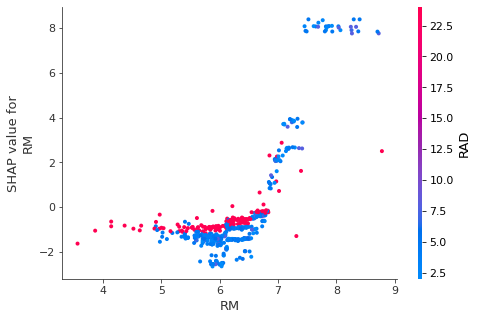

In [16]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X)

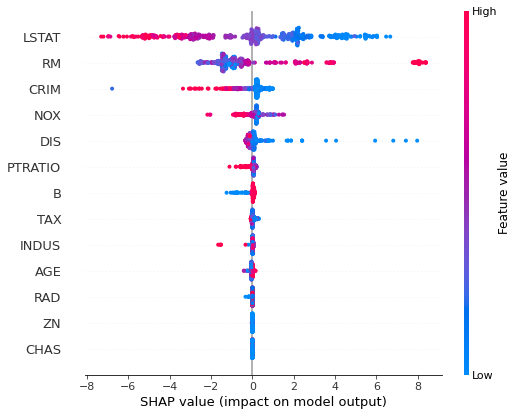

In [17]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

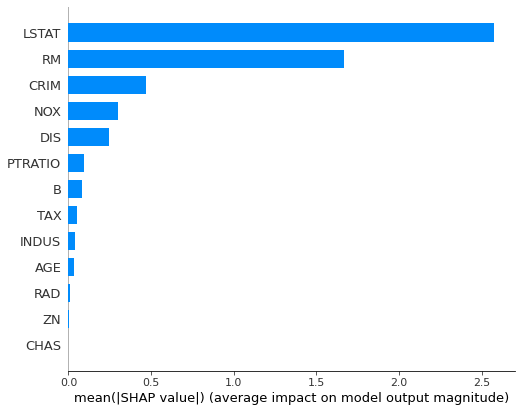

In [18]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [21]:
# Deep learning

In [23]:
# this is the code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [30]:
import torch
torch.cuda.is_available()

import tensorflow as tf
tf.test.is_gpu_available()

True

In [31]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 42s 90ms/step - loss: 2.2842 - accuracy: 0.1460 - val_loss: 2.2537 - val_accuracy: 0.2037
Epoch 2/12
469/469 [==============================] - 44s 94ms/step - loss: 2.2376 - accuracy: 0.2505 - val_loss: 2.1978 - val_accuracy: 0.4507
Epoch 3/12
469/469 [==============================] - 43s 91ms/step - loss: 2.1780 - accuracy: 0.3568 - val_loss: 2.1222 - val_accuracy: 0.5976
Epoch 4/12
469/469 [==============================] - 43s 91ms/step - loss: 2.0968 - accuracy: 0.4413 - val_loss: 2.0153 - val_accuracy: 0.6615
Epoch 5/12
469/469 [==============================] - 42s 90ms/step - loss: 1.9862 - accuracy: 0.4974 - val_loss: 1.8730 - val_accuracy: 0.6955
Epoch 6/12
469/469 [==============================] - 42s 89ms/step - loss: 1.8460 - accuracy: 0.5417 - val_loss: 1.6957 - val_accuracy: 0.7240
Epoch 7/12
469/469 [==============================] - 42s 89ms/

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


keras is no longer supported, please use tf.keras instead.


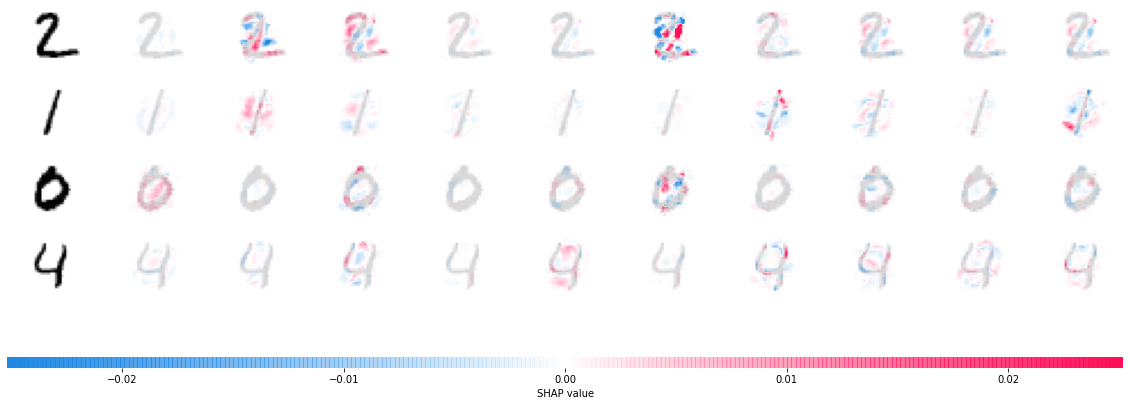

In [32]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])